In [3]:
from scipy.io.wavfile import read 
import numpy as np
import moviepy.editor as mp
from moviepy.video.io.VideoFileClip import VideoFileClip
import os

def get_time_of_max_volume(wav_file: str):
    samplerate, data = read(wav_file)
    #only needed for 2 channel audio data
    data_flatten = data.flatten()
    index_max = np.argmax(data_flatten)
    time_max = index_max/samplerate
    return time_max

def get_duration(wav_file: str):
    samplerate, data = read(wav_file)
    return len(data)/samplerate

def get_data(wav_file: str):
    samplerate, data = read(wav_file)
    return data

def get_samplerate(wav_file: str):
    samplerate, data = read(wav_file)
    return samplerate

def get_time_vector(wav_file: str, duration, samplerate):
    time_vector = np.arange(0,duration,1/samplerate) #time vector
    return time_vector

chunk:  18%|█▊        | 255/1434 [00:00<00:00, 1425.48it/s, now=None]

MoviePy - Writing audio in ../example_assets/Gehen-6,5.wav


MoviePy - Done.


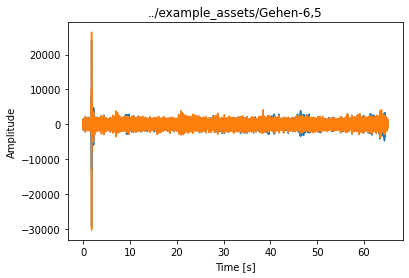

In [4]:
import matplotlib.pyplot as plt

def draw_sound_graph(mp4_file_name):
    clip = mp.VideoFileClip(mp4_file_name + ".mp4")
    clip.audio.write_audiofile(mp4_file_name + ".wav")
    data = get_data(mp4_file_name + ".wav")
    samplerate = get_samplerate(mp4_file_name + ".wav")
    duration = get_duration(mp4_file_name + ".wav")
    time_vector = get_time_vector(mp4_file_name + ".wav", duration, samplerate)

    plt.plot(time_vector,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(mp4_file_name)
    plt.show()

    if os.path.exists(mp4_file_name + ".wav"):
        os.remove(mp4_file_name + ".wav")
    else:
        print("The file does not exist")

draw_sound_graph("../example_assets/Gehen-6,5")